In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from  BSVol_to_LocVol import BSVol_to_LocVol
from plot_df_3d import plot_df_3d 


In [107]:
option_df=pd.read_csv('options2.csv')

In [108]:
option_df.columns

Index(['ticker', 'date', 'cp_flag', 'strike_price', 'exdate',
       'impl_volatility', 'exercise_style', 'forward_price'],
      dtype='object')

In [109]:
def diff_days(df):
    d1=df['date']
    d2=df['exdate']
    d1=str(d1)
    d2=str(d2)
    format_date='%Y%m%d'
    day1=datetime.strptime(d1, format_date)
    day2=datetime.strptime(d2, format_date)
    return (day2 - day1).days

In [110]:
option_df['time_diff']=option_df.apply(diff_days,axis=1)

In [111]:
option_df['time_diff']=option_df['time_diff']/365

In [112]:
# option_df.set_index(['ticker','date'],inplace=True)
# option_df=option_df[['cp_flag','strike_price','exdate','impl_volatility','exercise_style','forward_price']]


In [113]:
r=0.01
spot=2046.74#as 20150209
option_df['forward_price']=spot*np.exp(option_df['time_diff']*r)

In [114]:
option_df['log_strike']=np.log(option_df['strike_price']/1000/option_df['forward_price'])

In [115]:
imp_vol=option_df.sort_values(by=['log_strike','time_diff']).set_index(['log_strike','time_diff'])['impl_volatility']

In [116]:
imp_vol = imp_vol[~imp_vol.index.duplicated(keep='first')]

In [117]:
imp_vol=imp_vol.unstack()


In [118]:
imp_vol=imp_vol.loc[-0.4:0.2]

In [119]:
imp_vol

time_diff,0.010959,0.030137,0.049315,0.068493,0.087671,0.106849,0.126027,0.136986,0.142466,0.164384,...,0.386301,0.471233,0.605479,0.638356,0.857534,0.890411,0.931507,1.353425,1.852055,2.849315
log_strike,,,,,,,,,,,,,,,,,,,,,
-0.399986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0.399822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0.399630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0.399438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0.399219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.198974,NaN,NaN,NaN,NaN,NaN,0.20571,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.199166,NaN,NaN,NaN,NaN,0.211729,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.199358,NaN,NaN,NaN,0.239226,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
temp_df

time_diff,0.010959,0.030137,0.049315,0.068493,0.087671,0.106849,0.126027,0.136986,0.142466,0.164384,...,0.386301,0.471233,0.605479,0.638356,0.857534,0.890411,0.931507,1.353425,1.852055,2.849315
-4.000000e-01,NaN,NaN,NaN,NaN,NaN,0.278098,NaN,0.292369,0.318716,0.320012,...,0.325301,0.325140,0.316823,0.293099,0.295870,0.279296,0.289629,0.254162,0.265575,0.254851
-3.000000e-01,NaN,NaN,NaN,NaN,NaN,0.315694,0.299028,0.298333,0.314918,0.313712,...,0.291319,0.283871,0.276611,0.265712,0.263464,0.252963,0.260852,0.235587,0.245099,0.240475
-2.000000e-01,NaN,NaN,0.229476,0.213165,0.229922,0.275517,0.261342,0.260507,0.267340,0.263680,...,0.243151,0.239342,0.238201,0.229712,0.232611,0.222765,0.227383,0.211938,0.222534,0.224849
-1.000000e-01,0.180387,0.176894,0.187893,0.191920,0.191530,0.198318,0.197273,0.196411,0.197354,0.194035,...,0.190711,0.191617,0.193399,0.188781,0.192514,0.187904,0.187628,0.189340,0.194893,0.206438
-1.110223e-16,0.175228,0.146363,0.126414,0.126345,0.124266,0.127636,0.126155,0.127210,0.127812,0.127572,...,0.138567,0.143059,0.140935,0.147372,0.147375,0.150487,0.149487,0.164246,0.167867,0.187216
1.000000e-01,0.401290,0.289411,0.215067,0.194162,0.165994,0.162382,0.153762,0.148622,0.149089,0.131266,...,0.118384,0.118021,0.116927,0.118204,0.121895,0.122440,0.124660,0.140164,0.146033,0.169706


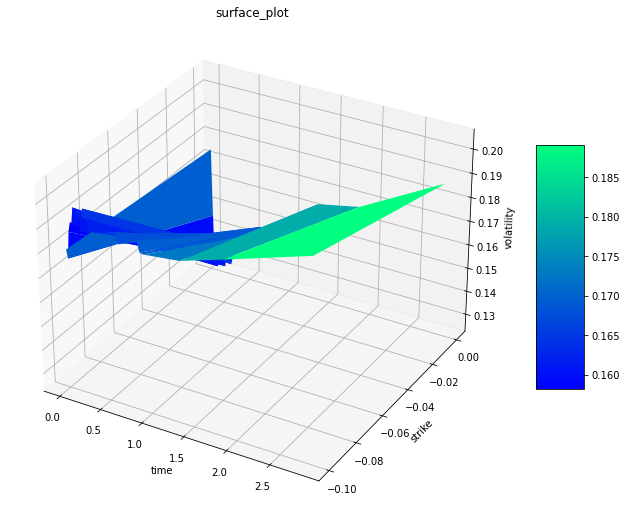

In [129]:
temp_df=imp_vol.groupby(pd.cut(imp_vol.index, np.arange(-0.6, 0.2, 0.1))).mean()
temp_df.index=np.arange(-0.6, 0.2, 0.1)[:-1]
plot_df_3d(temp_df.dropna())

In [130]:
option_df['log_strike'].describe()

count    6580.000000
mean       -0.211687
std         0.326179
min        -3.047327
25%        -0.314646
50%        -0.137344
75%        -0.001535
max         0.532953
Name: log_strike, dtype: float64

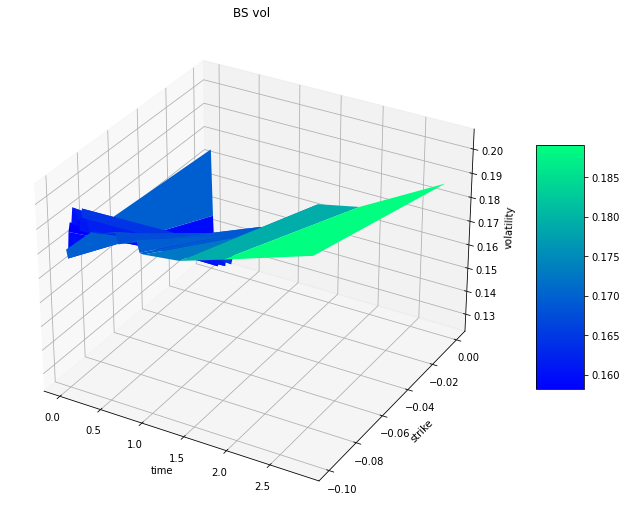

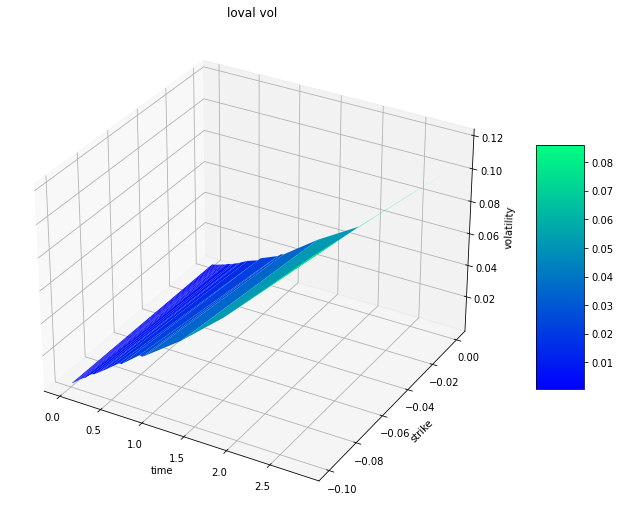

error: (mx>kx) failed for hidden mx: regrid_smth:mx=2

In [131]:
LV=BSVol_to_LocVol(temp_df.dropna())

array([[nan]])

In [ ]:
SPX=SPX[SPX['exdate']==np.min(SPX['exdate'])].dropna()

Text(0, 0.5, 'imp_vol')

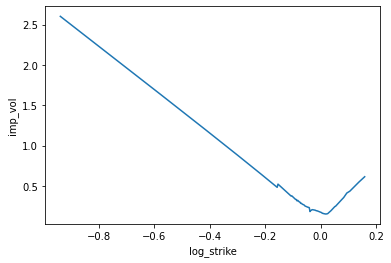

In [ ]:
imp_vol=SPX.groupby('log_strike')['impl_volatility'].mean()
plt.plot(imp_vol)
plt.xlabel('log_strike')
plt.ylabel('imp_vol')

In [ ]:
## Next step is to get implied vol surface(multiple dates) for SPX as of 20150209 and feed that to BSVol_to_LocVol
